<a href="https://colab.research.google.com/github/Tiagee0730/Prediction-of-Product-Sales/blob/main/Project_1_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Pandas

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Drive

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [19]:
filename = '/content/sales_predictions.csv'

In [20]:
df = pd.read_csv('/content/sales_predictions.csv')

1. There are 12 columns and 8523 rows.
2. The data type of each variable:
- Item_identifier = object
- Item_weight = float
- Item_Fat_Content = object
- Item_Visibility = float
- Item_Type = Object
- Item_MRP = float
- Outlet_Identifier = Object
- Outlet_Establishment_Year - Integer
- Outlet_Size = Object 
- Outlet_Location_Type = Object
- Outlet_Type = Object
- Item_Outlet_Sales = Float

*Use df.info() and sd.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.*

In [21]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Cleaning


3. There are not any duplicates ; verified with df.duplicated().sum()

In [22]:
### remove duplicate data
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [23]:
df.duplicated().sum()

0

There is no justification for removing any columns

In [24]:
# is there a relationship between column value and other data?
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

4. There are missing values
5. How will I address them? 

**I am going to fill in the Outlet_size with 'Missing' and the Item_weight with the median of the column for the missing values.** 

Reason - Outlet_Size is too important to drop and it is not a number that can be estimated. The Item Weight is too import to drop as well so we will use the median because it is the closest estimation to what it would be.

In [25]:

#check for missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [50]:
median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight, inplace=True)
df.isna().sum()
(df['Item_Weight']).median()

12.6

In [27]:
df['Outlet_Size'].fillna('Missing', inplace=True)

In [28]:
#check to make sure code worked correctly. Item_Weight and Outlet_Size should have 0 missing
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

6. - **How can I address the missing values?** - I added 'Missing' in the place of missing values. I use the median for the numerical category 'Item_Weight'

**There are no more empty values**

7. Find and fix any inconsistent categories of data - did not find any.

In [29]:
df.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
95,FDU04,12.60,Low Fat,0.009715,Frozen Foods,120.0414,OUT019,1985,Small,Tier 1,Grocery Store,487.3656
96,FDF41,12.15,Low Fat,0.131384,Frozen Foods,246.0460,OUT049,1999,Medium,Tier 1,Supermarket Type1,1231.7300
97,FDB56,8.75,Regular,0.074613,Fruits and Vegetables,187.4556,OUT035,2004,Small,Tier 2,Supermarket Type1,3755.1120
98,NCP18,12.60,Low Fat,0.028460,Household,149.9708,OUT027,1985,Medium,Tier 3,Supermarket Type3,4363.6532


8. For any numerical columns, obtain the summary statistics

In [30]:
df.describe().round(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000,8523.000,8523.000,8523.000,8523.000
mean,12.813,0.066,140.993,1997.832,2181.289
std,4.227,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,9.310,0.027,93.826,1987.000,834.247
50%,12.600,0.054,143.013,1999.000,1794.331
75%,16.000,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


Boxplot

In [38]:
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

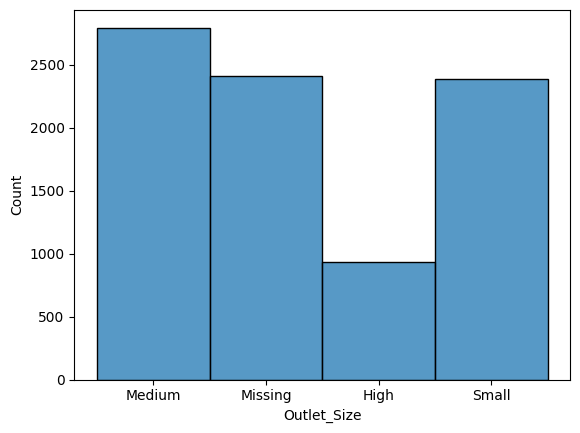

In [60]:
ax = sns.histplot(data = df, x = 'Outlet_Size')


- This histogram shows that majority of outlet sales were Medium.

<ipython-input-52-0ba9b4a518e0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap = 'Reds');


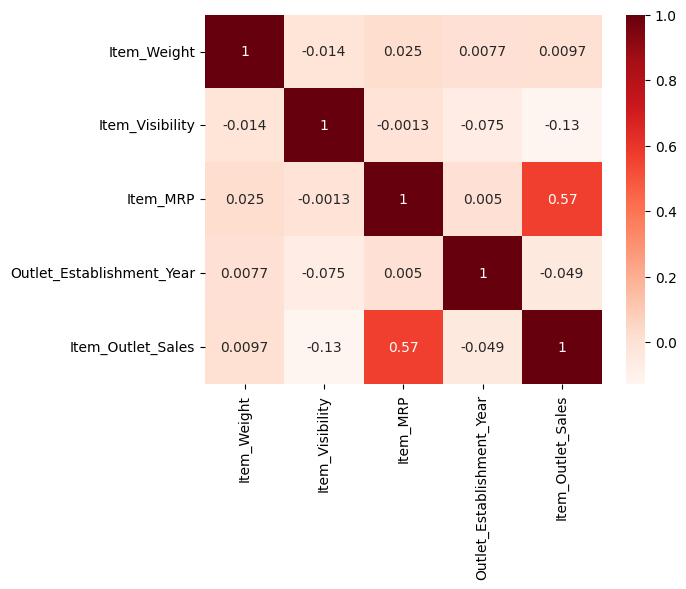

In [52]:
sns.heatmap(df.corr(), annot=True, cmap = 'Reds');

There is a strong correlation between MRP and Outlet sales. Everything else is pretty weak.

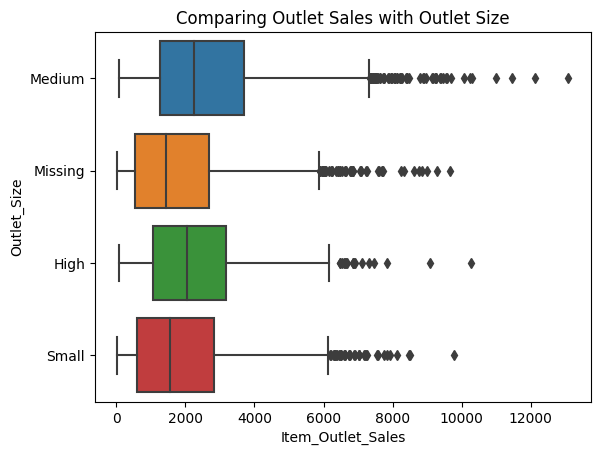

In [59]:
ax = sns.boxplot(x='Item_Outlet_Sales', y='Outlet_Size', data = df)
ax.set_title("Comparing Outlet Sales with Outlet Size");
